In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Task 1: Dataset Exploration

In [7]:
# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names

# Convert to DataFrame for better visualization
X = pd.DataFrame(X, columns=feature_names)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Task 2: Linear Regression Model

In [3]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate baseline model Performance
baseline_r2 = r2_score(y_test, y_pred)
print(f"Baseline Model R^2 Score: {baseline_r2: 4f}")


Baseline Model R^2 Score:  0.452603


## Task 3: Implement Recursive Feature Elimination (RFE)

In [5]:
num_features = X.shape[1]
r2_scores = []
feature_rankings = []

for i in range(num_features, 0, -1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    rfe.fit(X_train, y_train)
    
    selected_features = X_train.columns[rfe.support_]
    X_train_reduced, X_test_reduced = X_train[selected_features], X_test[selected_features]
    
    model.fit(X_train_reduced, y_train)
    y_pred = model.predict(X_test_reduced)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    feature_rankings.append((i, list(selected_features)))
    print(f"RFE with {i} features: R² Score = {r2:.4f}")

RFE with 10 features: R² Score = 0.4526
RFE with 9 features: R² Score = 0.4587
RFE with 8 features: R² Score = 0.4559
RFE with 7 features: R² Score = 0.4583
RFE with 6 features: R² Score = 0.4628
RFE with 5 features: R² Score = 0.4382
RFE with 4 features: R² Score = 0.4464
RFE with 3 features: R² Score = 0.4451
RFE with 2 features: R² Score = 0.4523
RFE with 1 features: R² Score = 0.2334


## Task 4: Analyse Feature Importance

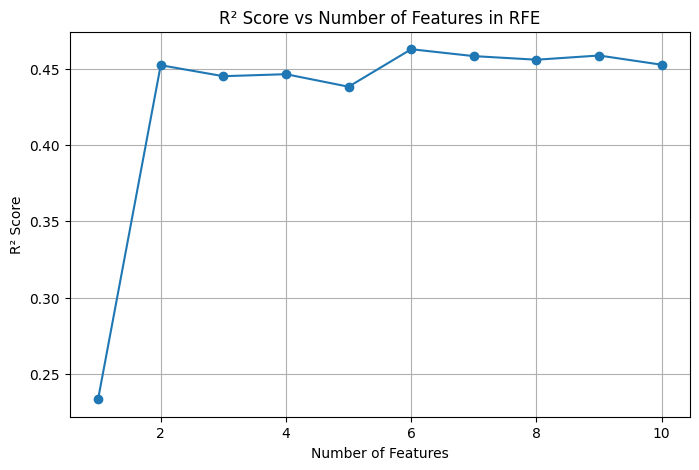


Optimal number of features: 10
Selected Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Final Model R² Score with 10 features: 0.4526


In [6]:
# Plot R² score vs number of features
plt.figure(figsize=(8,5))
plt.plot(range(num_features, 0, -1), r2_scores, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("R² Score")
plt.title("R² Score vs Number of Features in RFE")
plt.grid()
plt.show()

# Find the optimal number of features based on R² improvement threshold
optimal_features = next((feature_rankings[i] for i in range(len(r2_scores)-1) if abs(r2_scores[i] - r2_scores[i+1]) < 0.01), feature_rankings[-1])

print(f"\nOptimal number of features: {optimal_features[0]}")
print(f"Selected Features: {optimal_features[1]}")

# Train final model with optimal features
X_train_optimal = X_train[optimal_features[1]]
X_test_optimal = X_test[optimal_features[1]]
model.fit(X_train_optimal, y_train)
y_pred_optimal = model.predict(X_test_optimal)
final_r2 = r2_score(y_test, y_pred_optimal)
print(f"Final Model R² Score with {optimal_features[0]} features: {final_r2:.4f}")


## Task 5: Reflection

1. What did you learn about feature selection using RFE?

> Feature selection using RFE helps identify the most influential features by iteratively removing the least significant ones, improving model interpretability and performance.

2. How does RFE compare to other feature selection methods like LASSO in terms of methodology and results?

> RFE selects features based on model performance, while LASSO applies L1 regularization to shrink coefficients, sometimes setting them to zero. LASSO is computationally efficient but may be less interpretable.

3. What insights can you draw about the dataset from the selected features?

> The selected features indicate which factors most influence diabetes progression. Features like BMI and blood pressure may hold more predictive power, guiding medical insights and model improvements.